In [1]:
# Imports
import tensorflow as tf
import keras as K
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Inicializando a Rede Neural Convolucional:

In [2]:
classifier = Sequential()

Converteremos todas as nossas imagens 256x256 pixels em um array 3D (pois as imagens são coloridas com 3 canais de cores).

In [3]:
#Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

Agrupamento (pooling) para reduzir o tamanho do mapa de features resultado da primeira camada de convolução (dividido por 2):

In [4]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [5]:
# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

In [6]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

Flatten para converter a estrutura de dados 2D resultado da camada anterior em uma estrutura 1D, ou seja, um vetor.

In [7]:
classifier.add(Flatten())

Usamos uma função de ativação retificadora (relu) e então uma função de ativação sigmóide para obter as probabilidades de cada imagem conter uma arma ou não.

In [8]:
#Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

Para compilar a rede, usamos o otimizador "Adam", um excelente algoritmo de primeira ordem para otimização baseada em gradiente de funções objetivas estocásticas, que toma como base uma estimativa adaptada de momentos de baixa ordem.

Usamos uma função log loss com "entropia binária cruzada", pois ela funciona bem com funções sigmóides. Nossa métrica será a acurácia, pois essa é nossa maior preocupação no treinamento deste tipo de modelo.

In [9]:
# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
# Criando os objetos train_datagen e validation_datagen com as regras de pré-processamento das imagens
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

Dois objetos criados anteriormente para pré-processar os dados de treino e de validação.

In [11]:
# Pré-processamento das imagens de treino e validação
training_set = train_datagen.flow_from_directory('dataset_treino',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('dataset_validation',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

Found 1425 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [12]:
# Executando o treinamento (esse processo pode levar bastante tempo, dependendo do seu computador)
classifier.fit_generator(training_set,
                         steps_per_epoch = 45,
                         epochs = 6,
                         validation_data = validation_set,
                         validation_steps = 45)

C:\Users\johnn\AppData\Local\Temp\ipykernel_26436\806987309.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


Epoch 1/6
45/45 [==============================] - 36s 759ms/step - loss: 0.2662 - accuracy: 0.8926
Epoch 2/6
45/45 [==============================] - 18s 408ms/step - loss: 0.1525 - accuracy: 0.9523
Epoch 3/6
45/45 [==============================] - 15s 337ms/step - loss: 0.1519 - accuracy: 0.9523
Epoch 4/6
45/45 [==============================] - 13s 281ms/step - loss: 0.1363 - accuracy: 0.9551
Epoch 5/6
45/45 [==============================] - 15s 324ms/step - loss: 0.1062 - accuracy: 0.9642
Epoch 6/6
45/45 [==============================] - 18s 402ms/step - loss: 0.1181 - accuracy: 0.9600


1/1 [==============================] - 0s 23ms/step
não tem uma arma na imagem


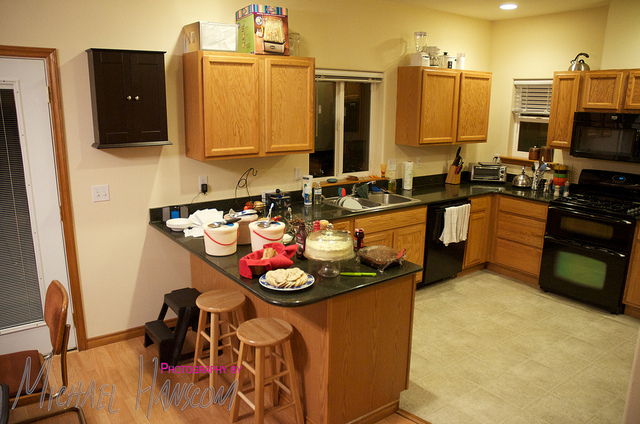

In [22]:
# teste Imagem
import numpy as np
from IPython.display import Image
from keras.preprocessing import image

test_image = tf.keras.utils.load_img('dataset_teste/9.jpg', target_size = (64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'não tem uma arma na imagem'
else:
    prediction = 'Tem uma arma na imagem'

print(prediction)
Image(filename='dataset_teste/5.jpg')